In [3]:
import pandas as pd
import numpy as np

# Load the CSV file (make sure the filename matches your uploaded file)
df = pd.read_csv('heart_disease.csv')

# Display the first few rows to confirm loading
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [4]:
# Show basic info about the dataframe
print(df.info())

# Check for missing values in each column
print("\nMissing values:\n", df.isnull().sum())

# Descriptive statistics for numeric columns
print("\nDescriptive statistics:\n", df.describe())

# Show the first few rows for a preview
print("\nFirst five rows:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 74.2+ KB
None

Missing values:
 age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

Descriptive 

Matplotlib is building the font cache; this may take a moment.


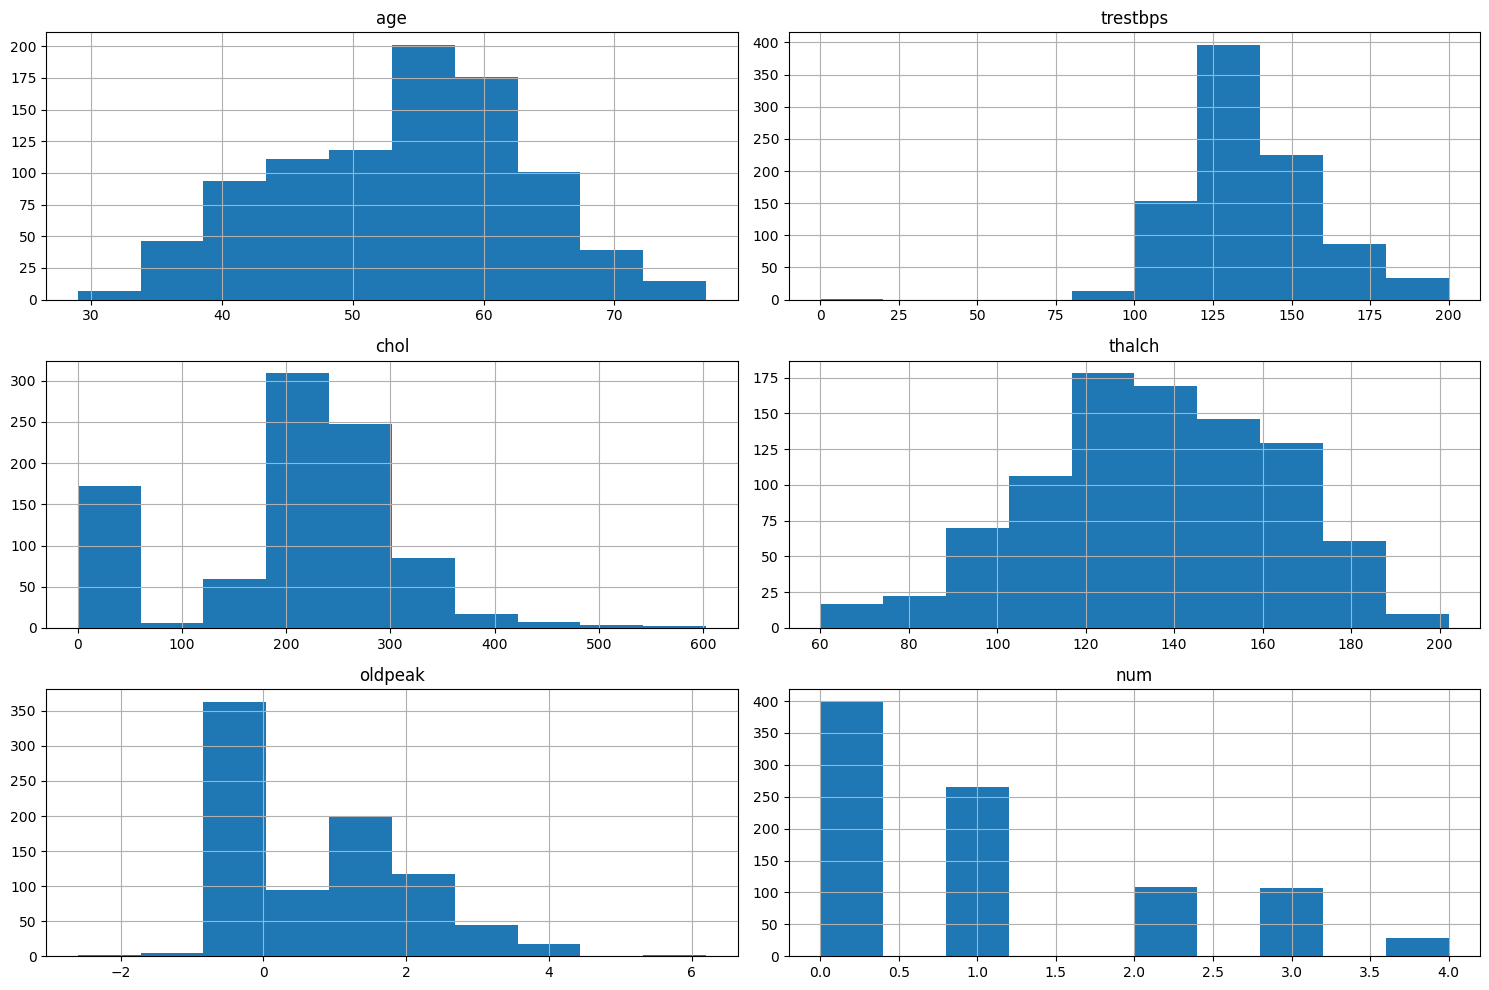

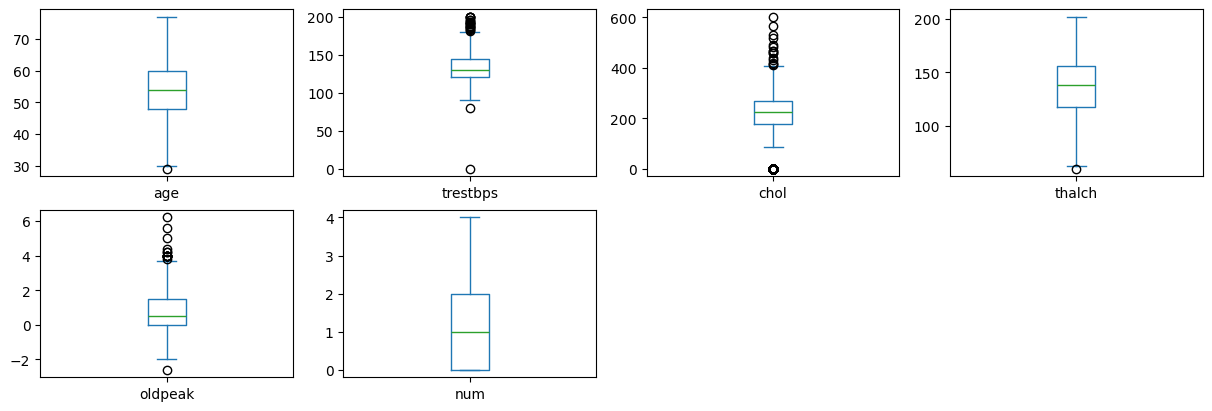

In [5]:
import matplotlib.pyplot as plt

# Histograms for numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots to visualize distributions and outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()


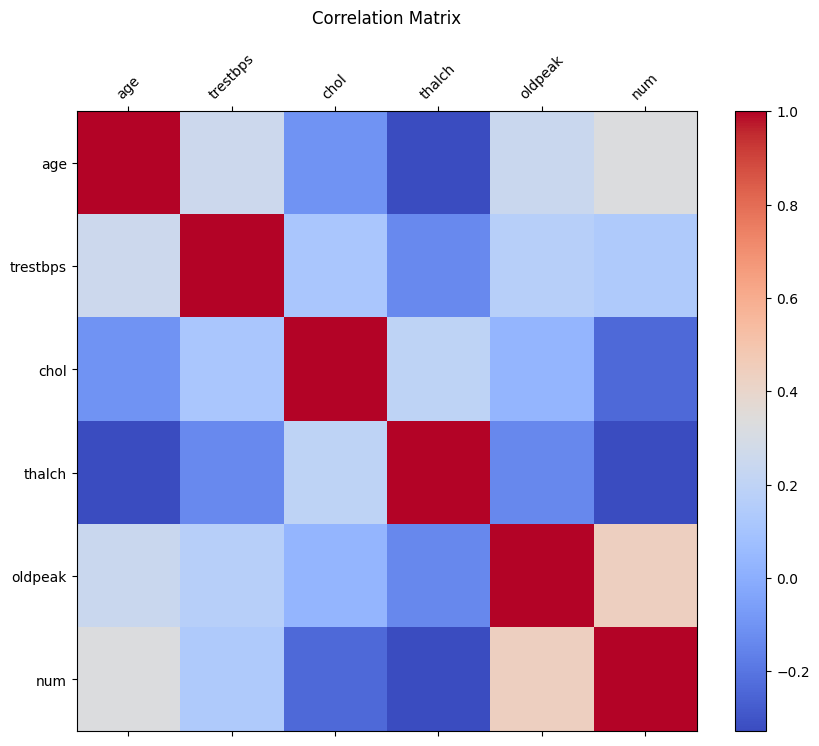

In [6]:
import numpy as np

# Compute correlation matrix for numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
cax = plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()


In [7]:
# Drop rows with missing values (simple option)
df_clean = df.dropna()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object type)
categorical_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


<ipython-input-8-c00f34106fc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col].astype(str))
<ipython-input-8-c00f34106fc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col].astype(str))
<ipython-input-8-c00f34106fc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [9]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_clean.select_dtypes(include=[float, int]).columns.tolist()
if 'num' in numeric_cols:
    numeric_cols.remove('num')  # Remove target if present

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])


<ipython-input-9-345009e23e3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])


In [15]:
from sklearn.model_selection import train_test_split

# Assume your target variable is 'num'
X = df_clean.drop('num', axis=1)
y = df_clean['num']

# For binary classification: convert to 0 and 1 if needed
# y = (y > 0).astype(int)

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (676, 12)
Testing set shape: (170, 12)


In [18]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit depth to prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [20]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.5941

Classification Report:


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83        80
         1.0       0.44      0.46      0.45        41
         2.0       0.30      0.50      0.38        14
         3.0       0.20      0.04      0.06        27
         4.0       0.00      0.00      0.00         8

    accuracy                           0.59       170
   macro avg       0.34      0.39      0.34       170
weighted avg       0.52      0.59      0.54       170


Confusion Matrix:
[[74  4  1  1  0]
 [15 19  6  1  0]
 [ 2  4  7  1  0]
 [ 5 14  7  1  0]
 [ 3  2  2  1  0]]


In [26]:
# Create binary target (0 = no disease, 1-4 = heart disease)
df['heart_disease'] = (df['num'] > 0).astype(int)
# Prepare features and target
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
X = df[feature_cols]
y = df['heart_disease']
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
     feature  importance
2         cp    0.397170
4       chol    0.152669
9    oldpeak    0.118963
0        age    0.091363
7     thalch    0.065643
8      exang    0.056834
6    restecg    0.041474
3   trestbps    0.033619
1        sex    0.031290
11      thal    0.010974
5        fbs    0.000000
10     slope    0.000000


Using class names: ['0.0', '1.0', '2.0', '3.0', '4.0']


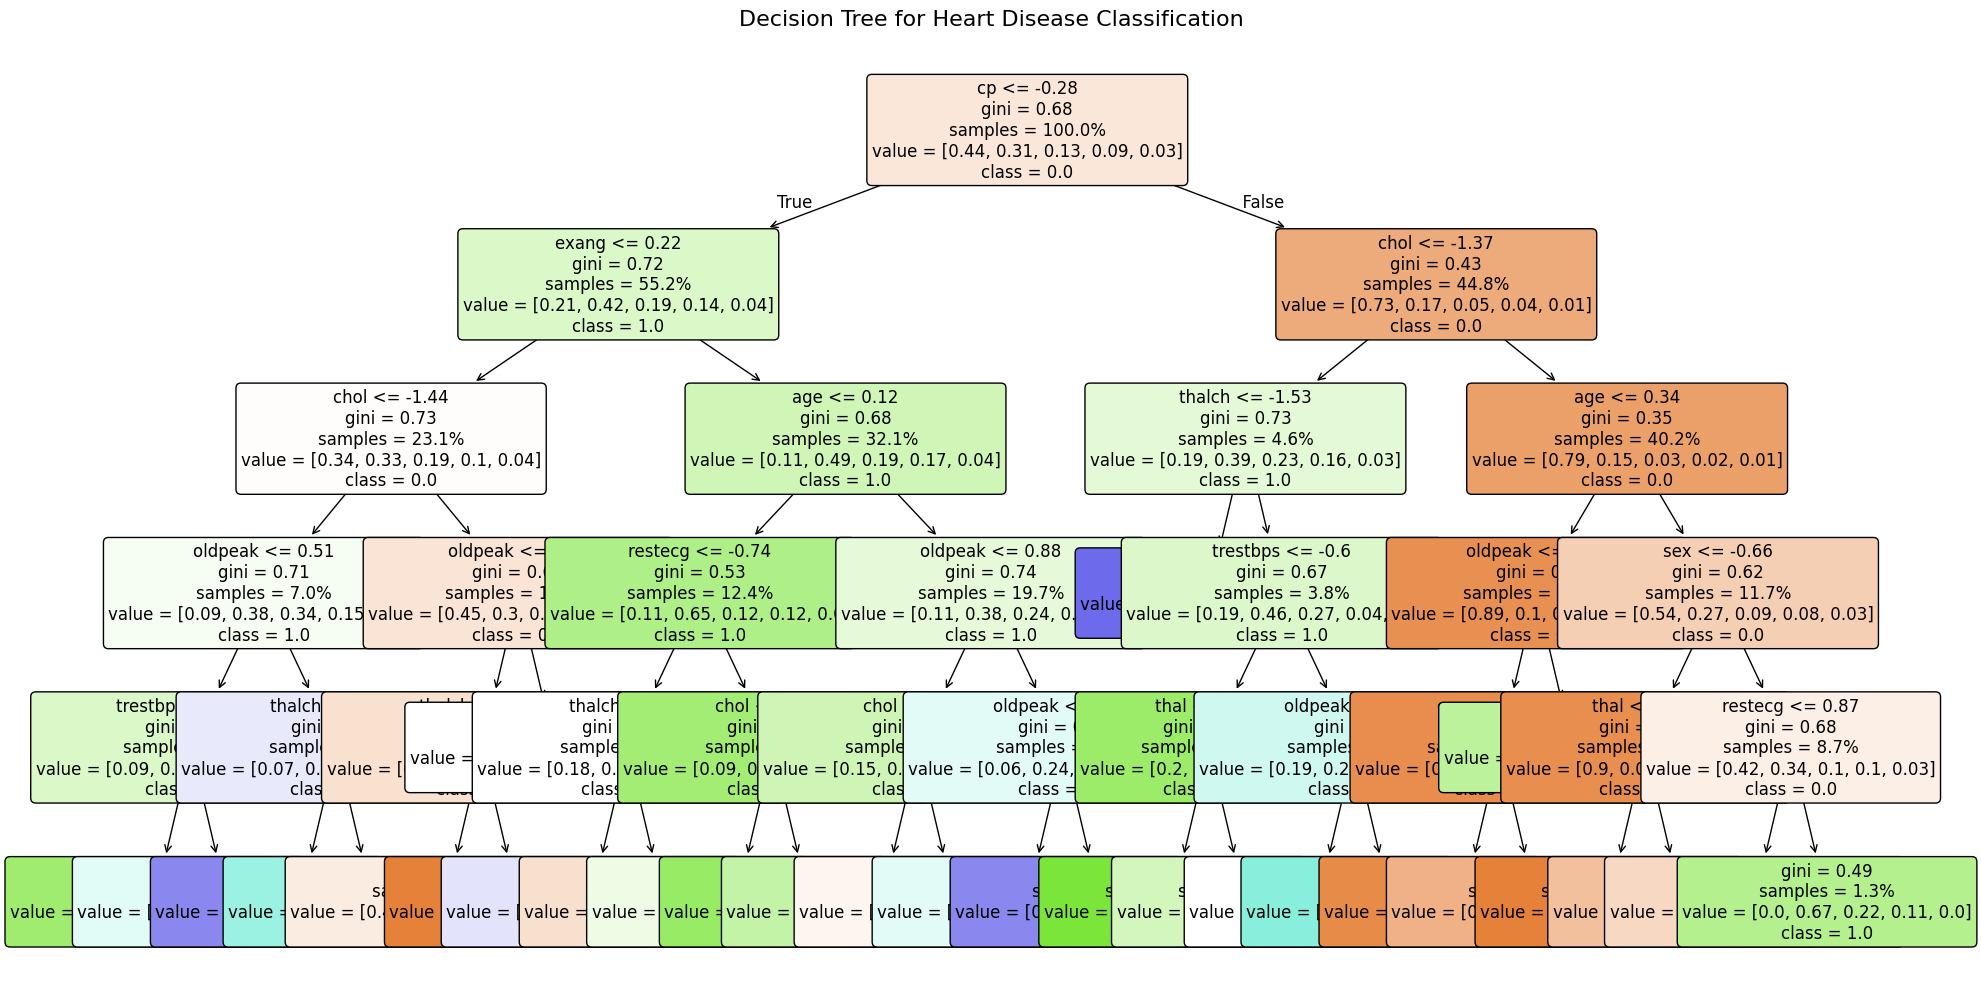


Decision Tree Rules:
|--- cp <= -0.28
|   |--- exang <= 0.22
|   |   |--- chol <= -1.44
|   |   |   |--- oldpeak <= 0.51
|   |   |   |   |--- trestbps <= -0.88
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- trestbps >  -0.88
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- oldpeak >  0.51
|   |   |   |   |--- thalch <= -0.51
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- thalch >  -0.51
|   |   |   |   |   |--- class: 2.0
|   |   |--- chol >  -1.44
|   |   |   |--- oldpeak <= 1.47
|   |   |   |   |--- thalch <= 1.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- thalch >  1.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- oldpeak >  1.47
|   |   |   |   |--- class: 3.0
|   |--- exang >  0.22
|   |   |--- age <= 0.12
|   |   |   |--- restecg <= -0.74
|   |   |   |   |--- thalch <= 0.40
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- thalch >  0.40
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- restecg >  -0.74
|   |   |   |   |---

In [38]:
# Create the decision tree visualization with proper error handling
plt.figure(figsize=(20, 10))

try:
    # Use the actual class labels from the model
    class_names_list = [str(cls) for cls in dt_model.classes_]
    print(f"Using class names: {class_names_list}")
    
    plot_tree(dt_model, 
              feature_names=feature_cols,
              class_names=class_names_list,  # Use actual class labels
              filled=True,
              rounded=True,
              fontsize=12,
              proportion=True,
              precision=2)
    
    plt.title('Decision Tree for Heart Disease Classification', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in plotting tree: {e}")
    print("Trying alternative approach without class names...")
    
    # Try without class names
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, 
              feature_names=feature_cols,
              filled=True,
              rounded=True,
              fontsize=12,
              proportion=True,
              precision=2)
    
    plt.title('Decision Tree for Heart Disease Classification', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# Alternative: Create a text representation
from sklearn.tree import export_text

tree_rules = export_text(dt_model, feature_names=feature_cols)
print("\nDecision Tree Rules:")
print(tree_rules)



In [39]:
"""In decision tree we use the hyperparameters which are max_samples,max_features,random_state,n_estimators. Which play key role in decision tree which are helpful in increases accuracy""" 

'In decision tree we use the hyperparameters which are max_samples,max_features,random_state,n_estimators. Which play key role in decision tree which are helpful in increases accuracy'

In [ ]:
"""Label Encoding:It is a method for converting the categorical data into numerical data.label encoding gives the alphabetic order values to the characters.
One hot Encoding: which gives dummy value